# Sign language digits recognition with Tensorflow

## Importing the libraries

In [2]:
# Libraries to manage the dataset
import os
from shutil import copyfile
import glob

# Deep leearnig and machine learning libraries (Keras and scikit learn)
from os import listdir
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Classic libraries with python
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


<a id="Data"></a>
## A look at the data

In [25]:
# Settings:
img_size = 64
num_class = 10

def get_img(data_path):
    # Getting image array from path:
    img = cv2.imread(data_path, 0)
    img = cv2.resize(img, (img_size, img_size))
    return img

def get_dataset(dataset_path='dataset'):
    labels = listdir(dataset_path) # Geting labels
    X = []
    Y = []
    for i, label in enumerate(labels):
        datas_path = dataset_path+'/'+label
        for data in listdir(datas_path):
            img = get_img(datas_path+'/'+data)
            X.append(img)
            Y.append(label)
    # Create dateset:
    X = np.array(X).astype('float32')
    # Normalized the input
    X = (X - np.mean(X))/np.std(X)
    Y = np.array(Y).astype('float32')
    # Categorize the output into binary class matrix
    Y = tf.keras.utils.to_categorical(Y, num_class)
    return X, Y

X,Y = get_dataset()
# add another axis representing grey-scale
X_axis = X[:,:,:,np.newaxis]

# Split the test set and validatio set
X_train, X_test, Y_train, Y_test = train_test_split(X_axis, Y, test_size = 0.2 , random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2 , random_state = 42)


In [4]:
print ("Total number of images = " + str(X.shape[0]))
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("number of test examples = " + str(X_val.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


Total number of images = 2062
number of training examples = 1319
number of test examples = 413
number of test examples = 330
X_train shape: (1319, 64, 64, 1)
Y_train shape: (1319, 10)
X_test shape: (413, 64, 64, 1)
Y_test shape: (413, 10)


<a id='neuralNet'></a>

## Model 1: Create our ANN Model

In [29]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model1.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/model1")
model1.fit(X_train, Y_train, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[tensorboard])

Train on 1319 samples, validate on 330 samples
Epoch 1/30
1319/1319 [==============================] - 3s 2ms/step - loss: 2.0947 - acc: 0.3768 - val_loss: 1.0679 - val_acc: 0.6485
Epoch 2/30
1319/1319 [==============================] - 2s 2ms/step - loss: 1.0400 - acc: 0.6399 - val_loss: 0.8045 - val_acc: 0.7455
Epoch 3/30
1319/1319 [==============================] - 2s 2ms/step - loss: 0.7107 - acc: 0.7453 - val_loss: 0.8689 - val_acc: 0.7485
Epoch 4/30
1319/1319 [==============================] - 2s 2ms/step - loss: 0.6252 - acc: 0.7885 - val_loss: 0.7552 - val_acc: 0.7485
Epoch 5/30
1319/1319 [==============================] - 2s 2ms/step - loss: 0.5454 - acc: 0.8165 - val_loss: 0.7389 - val_acc: 0.7788
Epoch 6/30
1319/1319 [==============================] - 2s 2ms/step - loss: 0.4392 - acc: 0.8506 - val_loss: 0.7360 - val_acc: 0.7697
Epoch 7/30
1319/1319 [==============================] - 2s 2ms/step - loss: 0.3558 - acc: 0.8704 - val_loss: 0.6454 - val_acc: 0.7879
Epoch 8/30
1319

<a id='runTheModel'></a>

## Evaluate the result of Model 1

In [28]:
model1.summary()
score = model1.evaluate(X_test, Y_test)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
__________

<a id='CNNModel'></a>

## Model 2: Create our CNN Model

In [32]:
# build our CNN
model2 = tf.keras.models.Sequential()
# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model2.add(tf.keras.layers.Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#outputs a (20, 20, 32) matrix
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model2.add(tf.keras.layers.Activation('relu'))
#outputs a (8, 8, 32) matrix
model2.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# dropout helps with over fitting by randomly dropping nodes each epoch
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/model2")
model2.fit(X_train, Y_train, batch_size=32, validation_data=[X_val, Y_val], epochs=30, callbacks=[tensorboard])


Train on 1319 samples, validate on 330 samples
Epoch 1/30
1319/1319 [==============================] - 5s 4ms/step - loss: 1.2185 - acc: 0.5898 - val_loss: 1.2614 - val_acc: 0.5242
Epoch 2/30
1319/1319 [==============================] - 5s 4ms/step - loss: 0.4809 - acc: 0.8431 - val_loss: 0.7100 - val_acc: 0.7970
Epoch 3/30
1319/1319 [==============================] - 5s 4ms/step - loss: 0.2844 - acc: 0.9128 - val_loss: 0.5500 - val_acc: 0.8727
Epoch 4/30
1319/1319 [==============================] - 4s 3ms/step - loss: 0.1912 - acc: 0.9500 - val_loss: 0.3674 - val_acc: 0.9182
Epoch 5/30
1319/1319 [==============================] - 4s 3ms/step - loss: 0.1360 - acc: 0.9629 - val_loss: 0.3014 - val_acc: 0.9242
Epoch 6/30
1319/1319 [==============================] - 4s 3ms/step - loss: 0.1026 - acc: 0.9742 - val_loss: 0.2734 - val_acc: 0.9333
Epoch 7/30
1319/1319 [==============================] - 4s 3ms/step - loss: 0.0823 - acc: 0.9773 - val_loss: 0.2518 - val_acc: 0.9333
Epoch 8/30
1319

<a id='runTheModel'></a>

## Evaluate the result of Model 2

In [33]:
model2.summary()
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 31, 31, 64)        1088      
_________________________________________________________________
activation_8 (Activation)    (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 64)        65600     
_________________________________________________________________
activation_9 (Activation)    (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 6, 6, 64)          0         
__________

## Predict the image

Correct Result is  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] , Answer is  [0]
Predicted Result from Neural net: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] , Predicted Answer is  [0]
Predicted Result from CNN: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] , Predicted Answer is  [0]


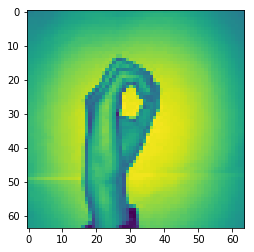

In [35]:
testNum = 182
test_image = X_axis[testNum]
plt.imshow(test_image[:,:,0])
test_image = np.expand_dims(test_image, axis = 0)

result1 = model1.predict(test_image)
result2 = model2.predict(test_image)
# For external image
#test_img = get_img('./test.jpg')
# plt.imshow(test_img)
#test_img = np.expand_dims(test_img, axis = 0)
# test_img = test_img[:,:,:,np.newaxis]
result1 = model1.predict(test_image)
result2 = model2.predict(test_image)
result1_val = [i for i, j in enumerate(np.round(result1,1)[0]) if j == max(np.round(result1,1)[0])]
result2_val = [i for i, j in enumerate(np.round(result2,1)[0]) if j == max(np.round(result2,1)[0])]
print('Correct Result is ',Y[testNum], ', Answer is ',[i for i, j in enumerate(Y[testNum]) if j == max(Y[testNum])])
print('Predicted Result from Neural net:',   np.round(result1,1)[0], ', Predicted Answer is ',result1_val)
print('Predicted Result from CNN:', np.round(result2,1)[0], ', Predicted Answer is ',result2_val)

# Model 3: CNN Model with Image Augmentation

In [36]:
# Create a more diverse dataset by rotating, shifting and zooming the image
datagen = ImageDataGenerator(
    rotation_range=16,
    width_shift_range=0.12,
    height_shift_range=0.12,
    zoom_range=0.12
    )
   
datagen.fit(X_train)


# Model3: Add Image Generate
# build our CNN
model3 = tf.keras.models.Sequential()

# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model3.add(tf.keras.layers.Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model3.add(tf.keras.layers.Activation('relu'))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#outputs a (20, 20, 32) matrix
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model3.add(tf.keras.layers.Activation('relu'))
#outputs a (8, 8, 32) matrix
model3.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# dropout helps with over fitting by randomly dropping nodes each epoch
model3.add(tf.keras.layers.Dropout(0.3))

model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/model2")
model3.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), validation_data=(X_val, Y_val), epochs=30, callbacks=[tensorboard])

Epoch 1/30
42/42 [==============================] - 9s 206ms/step - loss: 2.0716 - acc: 0.3204 - val_loss: 1.7521 - val_acc: 0.3636
Epoch 2/30
42/42 [==============================] - 4s 107ms/step - loss: 1.3523 - acc: 0.5285 - val_loss: 0.8932 - val_acc: 0.7727
Epoch 3/30
42/42 [==============================] - 5s 111ms/step - loss: 1.0075 - acc: 0.6550 - val_loss: 0.6805 - val_acc: 0.8939
Epoch 4/30
42/42 [==============================] - 5s 114ms/step - loss: 0.7426 - acc: 0.7350 - val_loss: 0.4834 - val_acc: 0.9152
Epoch 5/30
42/42 [==============================] - 7s 159ms/step - loss: 0.6564 - acc: 0.7879 - val_loss: 0.4663 - val_acc: 0.8818
Epoch 6/30
42/42 [==============================] - 6s 140ms/step - loss: 0.6061 - acc: 0.8009 - val_loss: 0.2892 - val_acc: 0.9455
Epoch 7/30
42/42 [==============================] - 7s 161ms/step - loss: 0.5525 - acc: 0.8102 - val_loss: 0.2556 - val_acc: 0.9273
Epoch 8/30
42/42 [==============================] - 4s 102ms/step - loss: 0.

## Evaluate the result of Model 3

In [37]:
model3.summary()
score = model3.evaluate(X_test, Y_test, verbose=0)
print('Loss: {:.4f}  Accuaracy: {:.4}%'.format(score[0],score[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 31, 31, 64)        1088      
_________________________________________________________________
activation_10 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        65600     
_________________________________________________________________
activation_11 (Activation)   (None, 12, 12, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 6, 6, 64)          0         
__________

Yay ! We clearly see an improvement ! 